In [3]:
import numpy as np
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
df=pd.read_csv('Bangalore.csv')

In [7]:
df.head()

,year,month,temp,vapour pressure,PET(Potential Evapo-Transpiration),rainfall
0,1975,Jan,21.88,24.44,5.85,0.00
1,1975,Feb,24.95,25.07,6.63,3.91
2,1975,Mar,26.81,25.11,7.43,11.14
3,1975,Apr,28.67,34.80,7.64,27.28
4,1975,May,27.05,46.93,7.24,124.76


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 6 columns):
year                                  672 non-null int64
month                                 672 non-null object
temp                                  672 non-null float64
vapour pressure                       672 non-null float64
PET(Potential Evapo-Transpiration)    672 non-null float64
rainfall                              672 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 31.6+ KB


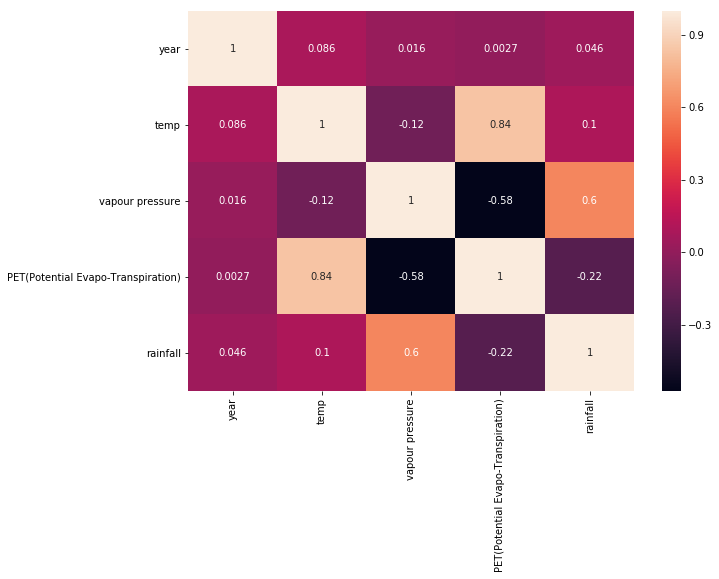

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

<Figure size 1440x1440 with 0 Axes>

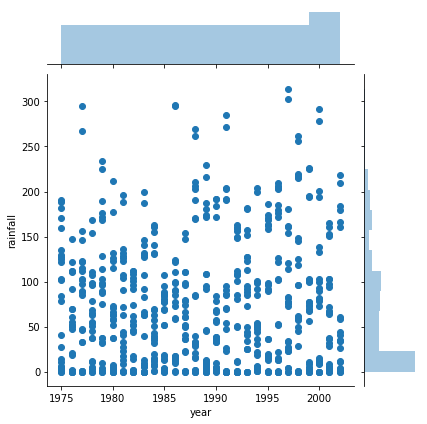

In [10]:
plt.figure(figsize=(20,20))
sns.jointplot(x='year',y='rainfall',data=df)

In [11]:
from sklearn.model_selection import train_test_split

In [20]:
df.columns

Index(['year', 'month', 'temp', 'vapour pressure',
       'PET(Potential Evapo-Transpiration)', 'rainfall'],
      dtype='object')

In [31]:
def converter(x):
    if x>0:
        return 1
    else:
        return 0

In [32]:
df=pd.read_csv('Bangalore.csv')
df.head()

,year,month,temp,vapour pressure,PET(Potential Evapo-Transpiration),rainfall
0,1975,Jan,21.88,24.44,5.85,0.00
1,1975,Feb,24.95,25.07,6.63,3.91
2,1975,Mar,26.81,25.11,7.43,11.14
3,1975,Apr,28.67,34.80,7.64,27.28
4,1975,May,27.05,46.93,7.24,124.76


In [33]:
X=df.drop(['month','rainfall'],axis=1)

y=df['rainfall'].apply(converter)

In [34]:
X.head()

,year,temp,vapour pressure,PET(Potential Evapo-Transpiration)
0,1975,21.88,24.44,5.85
1,1975,24.95,25.07,6.63
2,1975,26.81,25.11,7.43
3,1975,28.67,34.80,7.64
4,1975,27.05,46.93,7.24


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
td=DecisionTreeClassifier()

In [38]:
td.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
predictions=td.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.96      0.97      0.97       187

   micro avg       0.94      0.94      0.94       202
   macro avg       0.79      0.75      0.77       202
weighted avg       0.94      0.94      0.94       202

[[  8   7]
 [  5 182]]


# using random forests


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc=RandomForestClassifier(n_estimators=200)

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
pred=rfc.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.96      0.99      0.97       187

   micro avg       0.95      0.95      0.95       202
   macro avg       0.87      0.73      0.78       202
weighted avg       0.95      0.95      0.94       202

[[  7   8]
 [  2 185]]


In [49]:
y_test.value_counts()

1    187
0     15
Name: rainfall, dtype: int64